In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

%config InlineBackend.figure_format = 'retina'

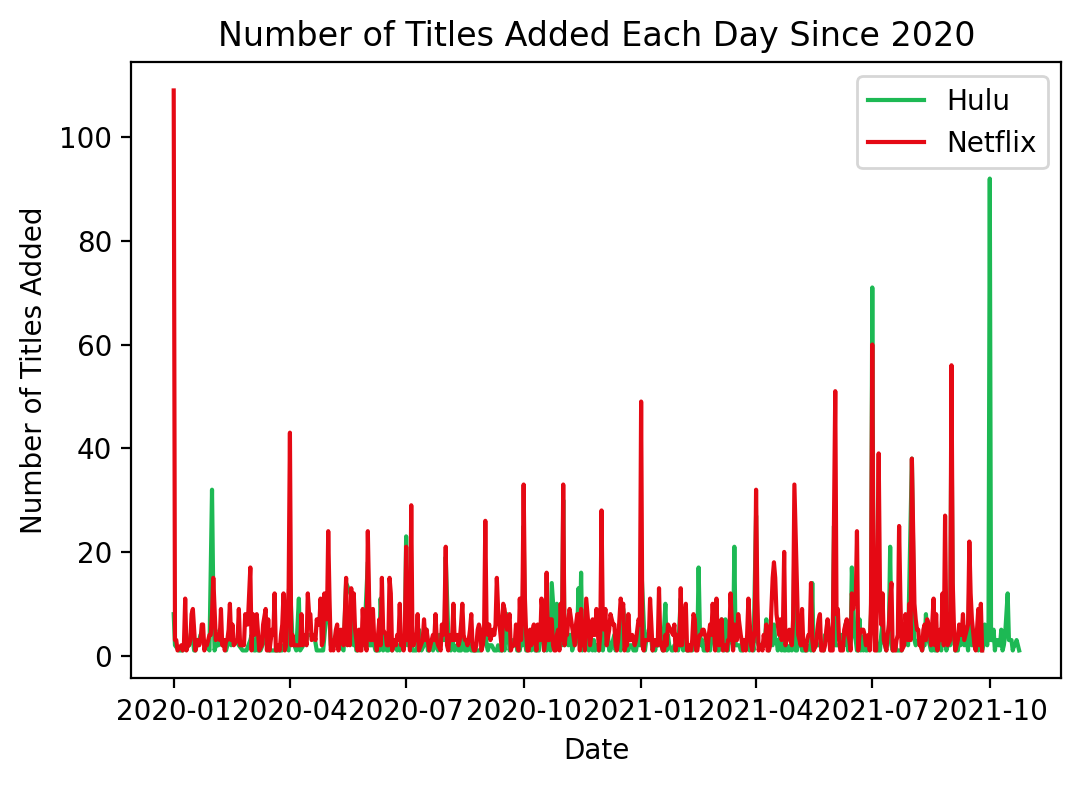

In [10]:
dfHuluClean = pd.read_csv('data/hulu_titles_modified.csv')
dfNetflixClean = pd.read_csv('data/netflix_titles_modified.csv')

dfHuluClean['date_added'] = pd.to_datetime(
    dfHuluClean['date_added'], errors='coerce')
dfNetflixClean['date_added'] = pd.to_datetime(
    dfNetflixClean['date_added'], errors='coerce')

dfHuluClean_2020 = dfHuluClean[dfHuluClean['date_added'] >= '2020-01-01']
dfNetflixClean_2020 = dfNetflixClean[dfNetflixClean['date_added']
                                     >= '2020-01-01']

hulu_titles_daily_count = dfHuluClean_2020.groupby(
    dfHuluClean_2020['date_added'].dt.date).size()
netflix_titles_daily_count = dfNetflixClean_2020.groupby(
    dfNetflixClean_2020['date_added'].dt.date).size()


fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(hulu_titles_daily_count.index,
        hulu_titles_daily_count.values, label='Hulu', color='#1DB954')
ax.plot(netflix_titles_daily_count.index,
        netflix_titles_daily_count.values, label='Netflix', color='#E50914')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Titles Added')
ax.set_title('Number of Titles Added Each Day Since 2020')
ax.legend()
plt.show()

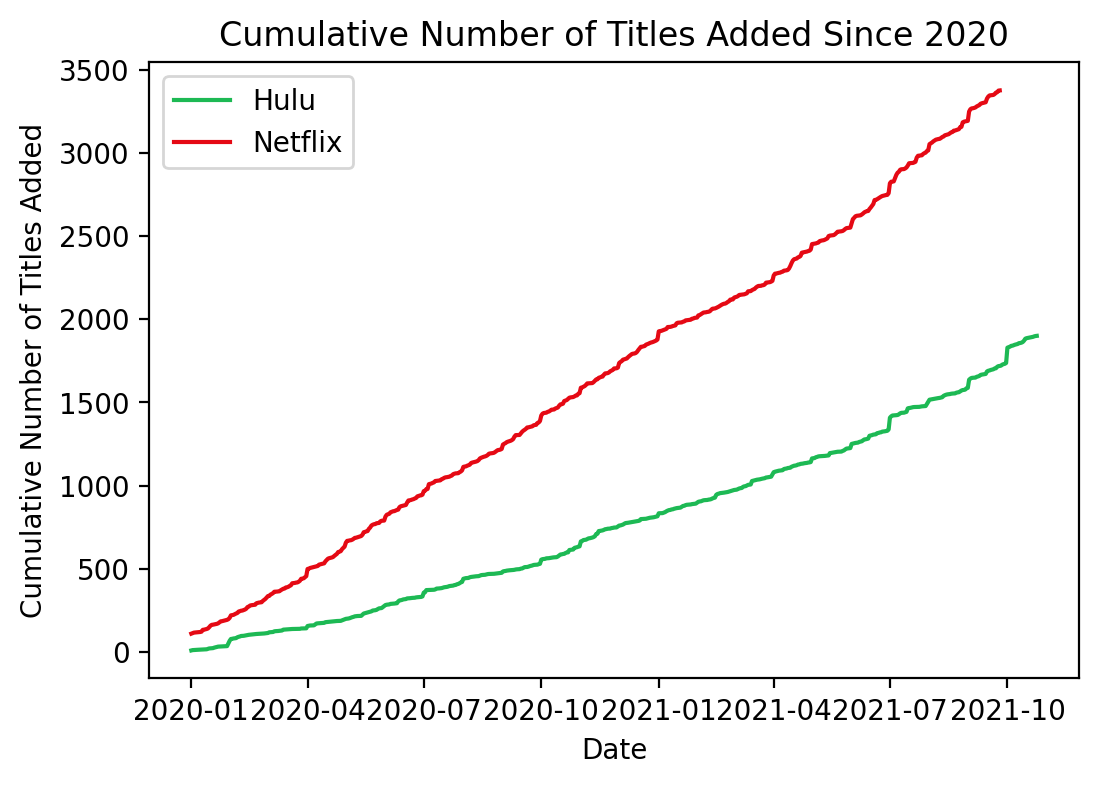

In [11]:
hulu_titles_cumulative_count = hulu_titles_daily_count.cumsum()
netflix_titles_cumulative_count = netflix_titles_daily_count.cumsum()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(hulu_titles_cumulative_count.index,
        hulu_titles_cumulative_count.values, label='Hulu', color='#1DB954')
ax.plot(netflix_titles_cumulative_count.index,
        netflix_titles_cumulative_count.values, label='Netflix', color='#E50914')

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Number of Titles Added')
ax.set_title('Cumulative Number of Titles Added Since 2020')
ax.legend()
plt.show()

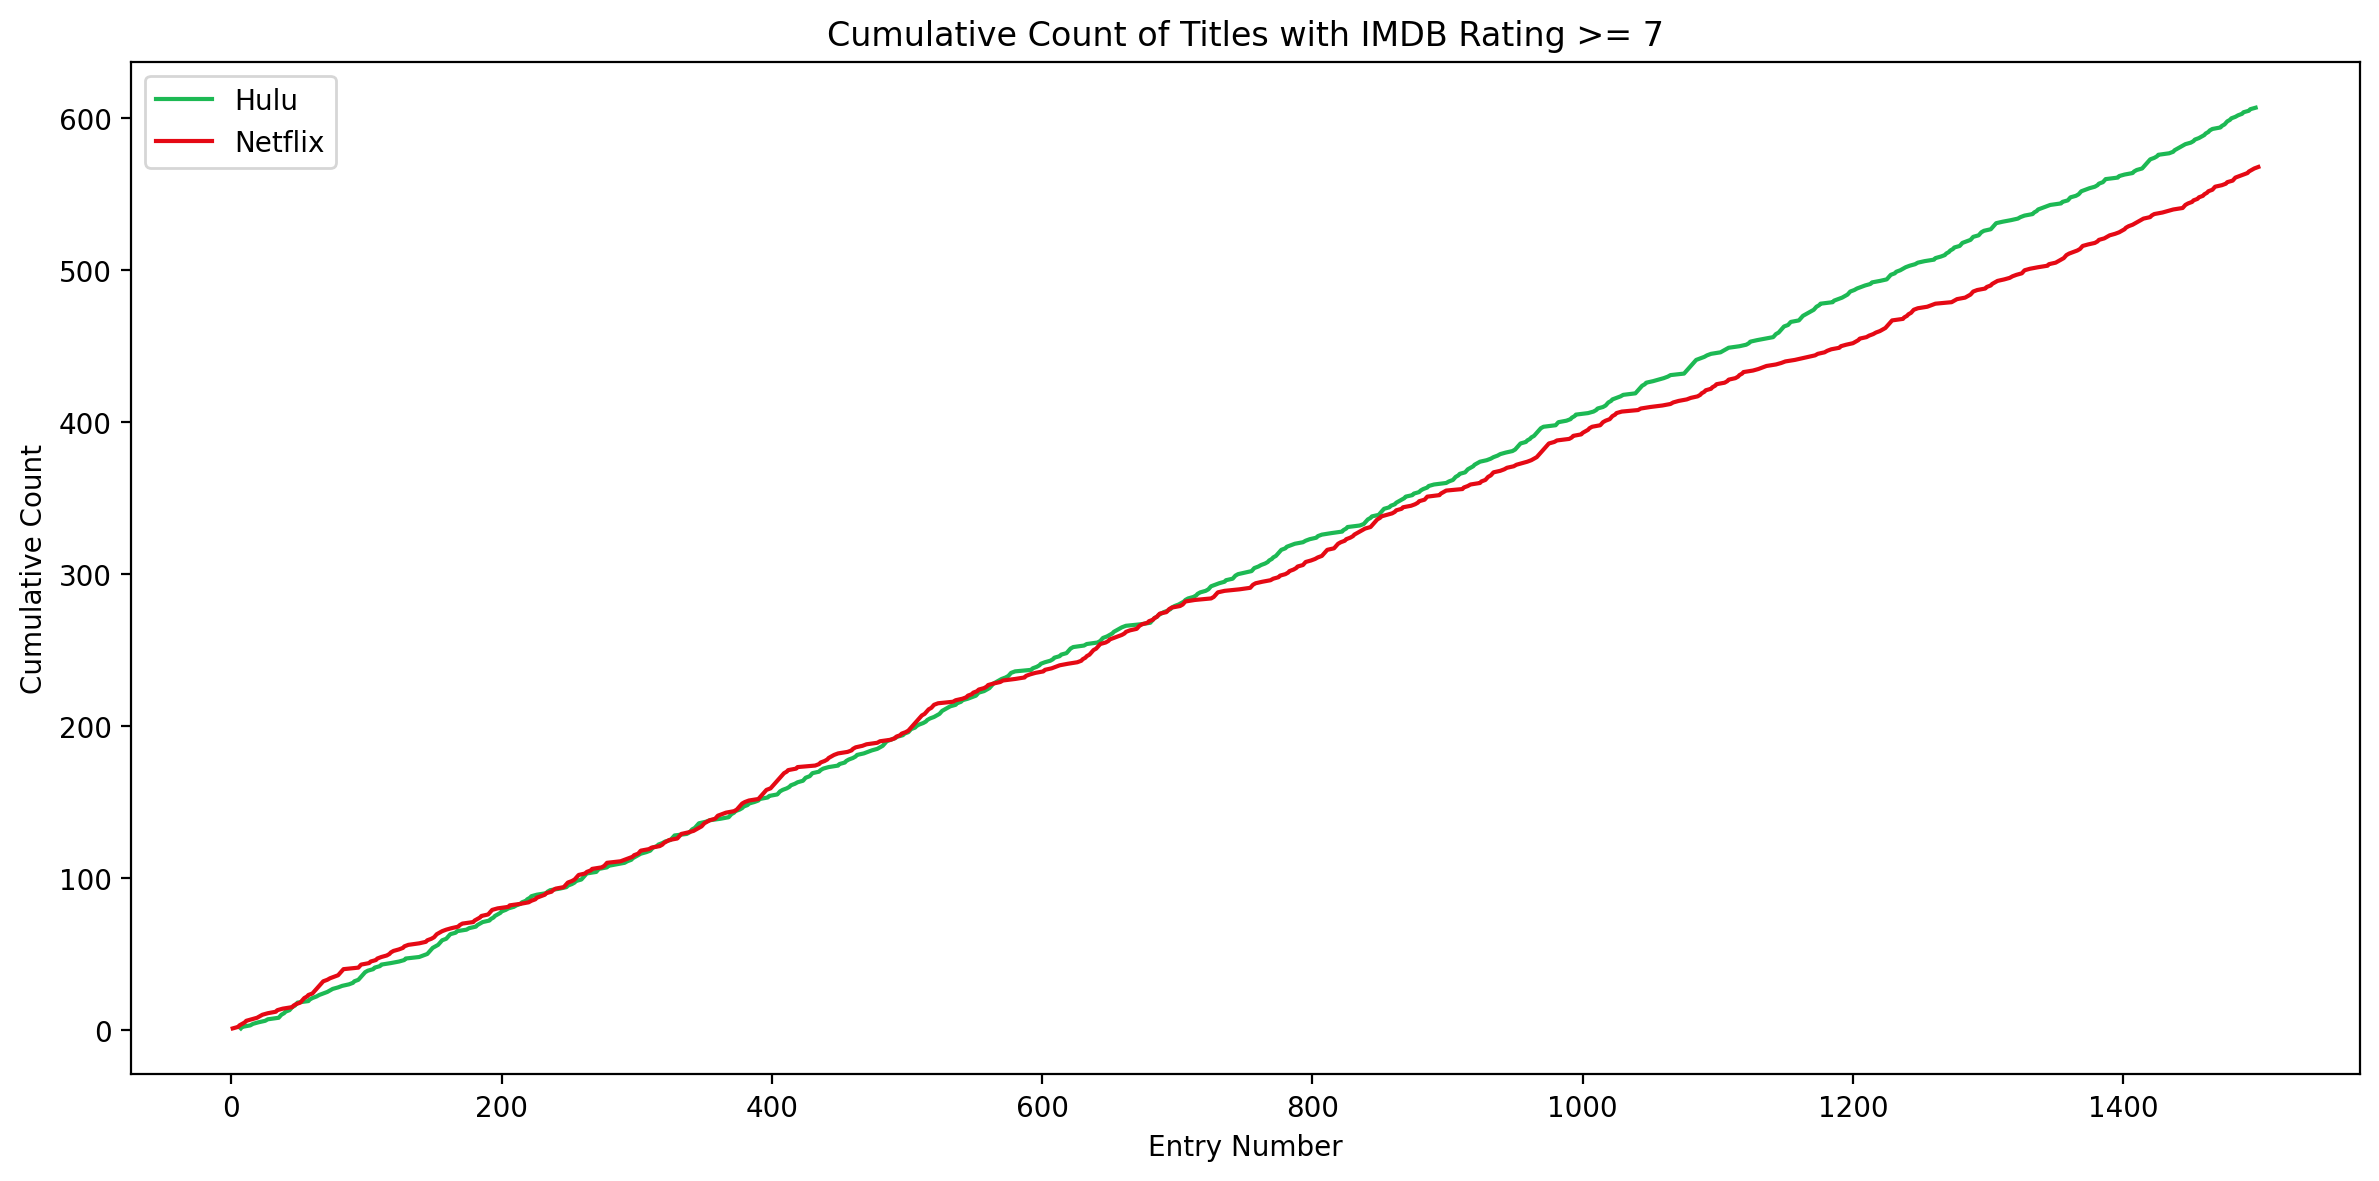

In [31]:
min_rating = 7

dfHulu1500 = pd.read_csv('data/hulu_1500.csv')
dfNetflix1500 = pd.read_csv('data/netflix_1500.csv')

dfHulu1500['date_added'] = pd.to_datetime(
    dfHulu1500['date_added'], errors='coerce')
dfNetflix1500['date_added'] = pd.to_datetime(
    dfNetflix1500['date_added'], errors='coerce')

dfHulu1500_filtered = dfHulu1500[dfHulu1500['IMDB_Rating'] >= min_rating].copy(
)
dfNetflix1500_filtered = dfNetflix1500[dfNetflix1500['IMDB_Rating'] >= min_rating].copy(
)

dfHulu1500_filtered.loc[:,
                        'cumulative_count'] = dfHulu1500_filtered['IMDB_Rating'].expanding().count()
dfNetflix1500_filtered.loc[:,
                           'cumulative_count'] = dfNetflix1500_filtered['IMDB_Rating'].expanding().count()

fig, ax = plt.subplots(figsize=(12, 6))

hulu_x = dfHulu1500_filtered.index + 1
hulu_y = dfHulu1500_filtered['cumulative_count']
ax.plot(hulu_x, hulu_y, color='#1DB954', label='Hulu')

netflix_x = dfNetflix1500_filtered.index + 1
netflix_y = dfNetflix1500_filtered['cumulative_count']
ax.plot(netflix_x, netflix_y, color='#E50914', label='Netflix')

ax.set_xlabel('Entry Number')
ax.set_ylabel('Cumulative Count')
ax.set_title(f'Cumulative Count of Titles with IMDB Rating >= {min_rating}')
ax.legend()

plt.tight_layout()
plt.show()

/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_18321/4196478337.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(hulu_country_counts.index, rotation=0)


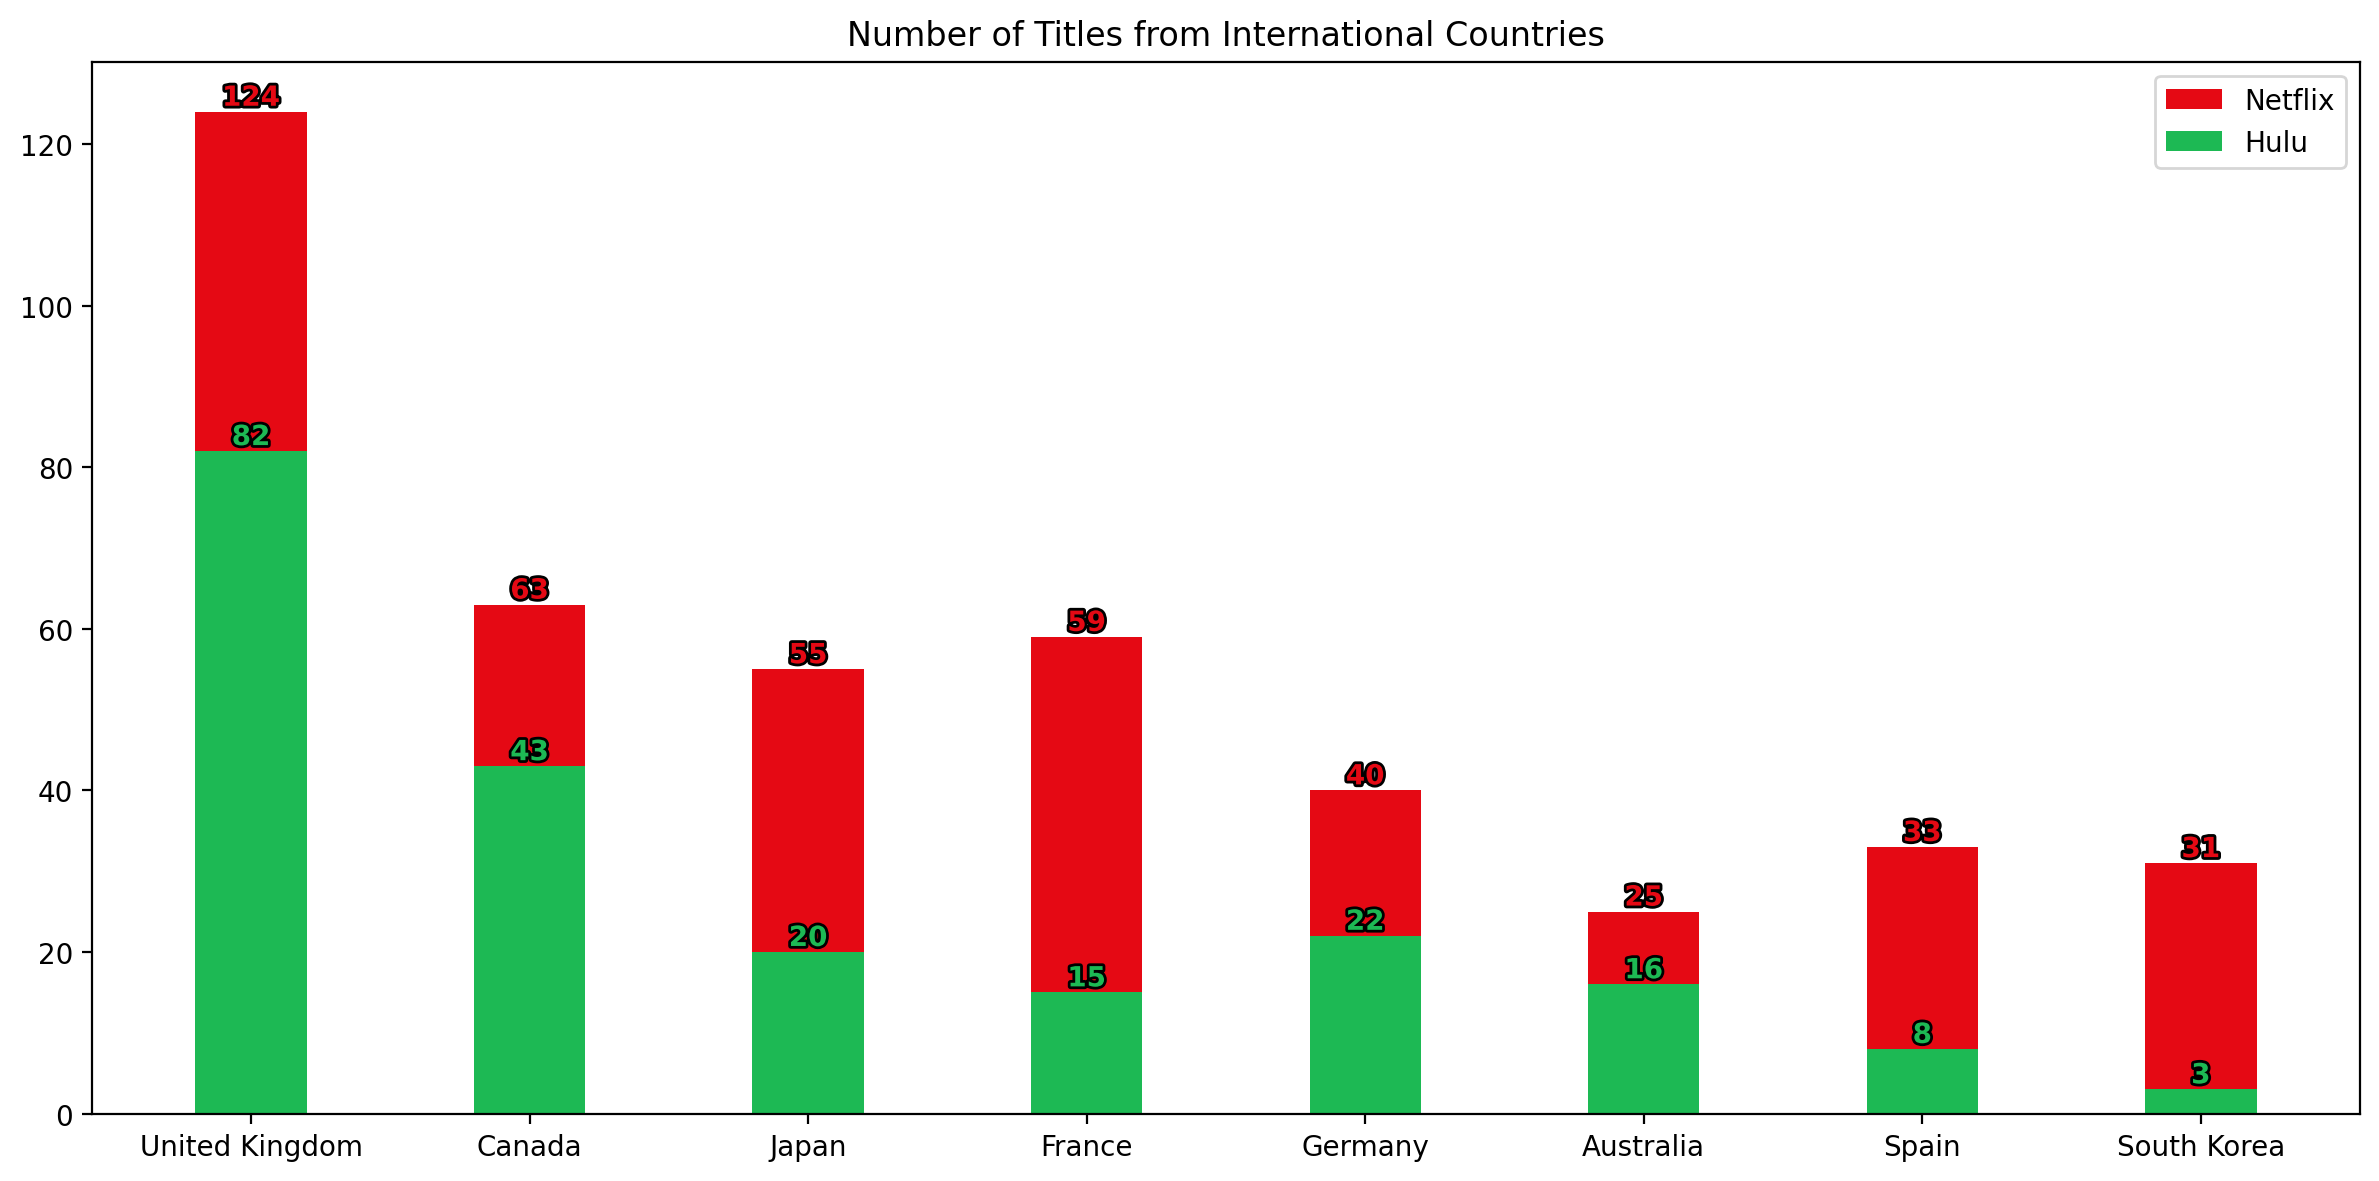

In [67]:
import matplotlib.patheffects as path_effects

dfHulu1500_countries = dfHulu1500['country'].str.split(
    ', ', expand=True).stack().reset_index(level=1, drop=True)
dfNetflix1500_countries = dfNetflix1500['country'].str.split(
    ', ', expand=True).stack().reset_index(level=1, drop=True)

hulu_country_counts = dfHulu1500_countries.value_counts()
netflix_country_counts = dfNetflix1500_countries.value_counts()

combined_country_counts = (hulu_country_counts + netflix_country_counts).drop(
    'United States', errors='ignore').nlargest(8)

hulu_country_counts = hulu_country_counts[combined_country_counts.index]
netflix_country_counts = netflix_country_counts[combined_country_counts.index]

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
bars2 = ax.bar(netflix_country_counts.index, netflix_country_counts.values,
               width=width, label='Netflix', color='#E50914')
bars1 = ax.bar(hulu_country_counts.index, hulu_country_counts.values,
               width=width, label='Hulu', color='#1DB954')

ax.set_title('Number of Titles from International Countries')
ax.legend()
ax.set_xticklabels(hulu_country_counts.index, rotation=0)

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', color='#1DB954', fontsize=10,
            fontweight='bold', path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', color='#E50914', fontsize=10,
            fontweight='bold', path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')])

plt.tight_layout()
plt.show()

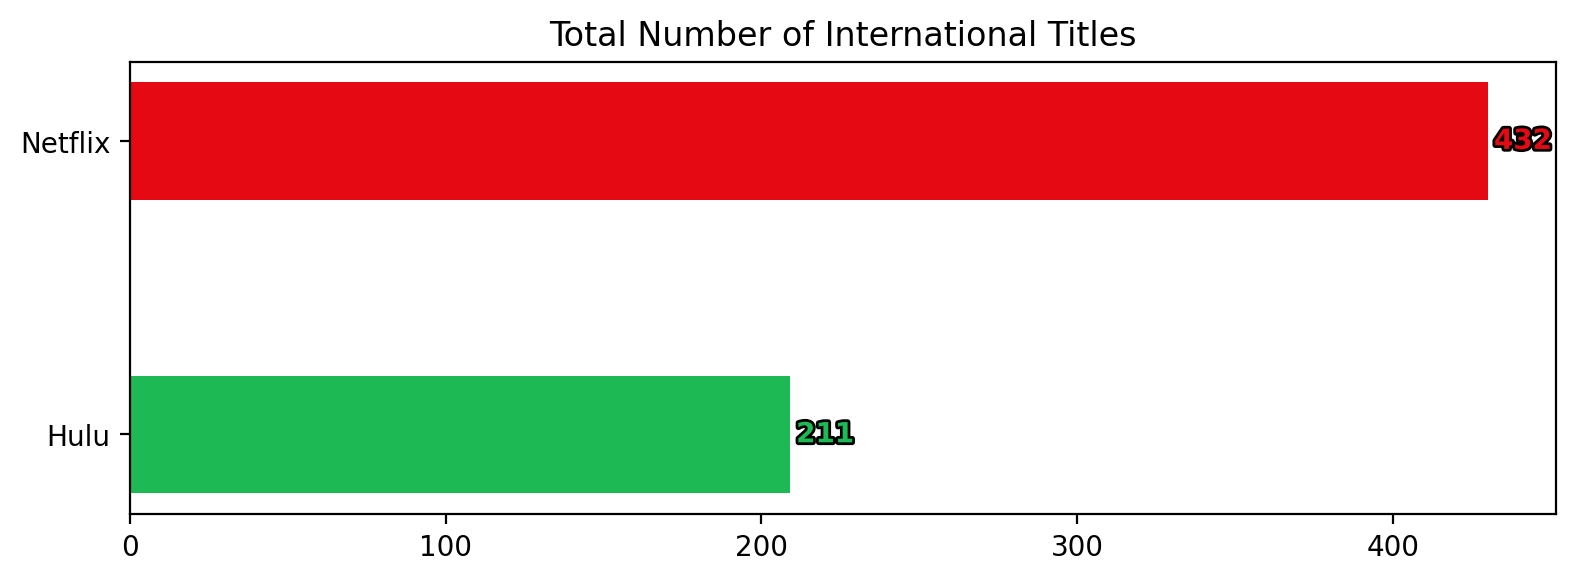

In [73]:
hulu_international_count = hulu_country_counts.sum()
netflix_international_count = netflix_country_counts.sum()

international_counts = pd.DataFrame({
    'Platform': ['Hulu', 'Netflix'],
    'Count': [hulu_international_count, netflix_international_count]
})

fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(international_counts['Platform'], international_counts['Count'], height=[
        0.4, 0.4], color=['#1DB954', '#E50914'])

ax.set_title('Total Number of International Titles')


for bar in bars:
    xval = bar.get_width() + 2
    color = bar.get_facecolor()
    text = ax.text(xval, bar.get_y() + bar.get_height()/2.0, int(xval), va='center', ha='left', color=color, fontsize=10, fontweight='bold')
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.tight_layout()
plt.show()

In [96]:
dfDocChecklist = pd.read_csv('data/Educational_Categories.csv')

huluEduChecklist = dfDocChecklist['Hulu'].dropna().tolist()
netflixEduChecklist = dfDocChecklist['Netflix'].dropna().tolist()

def inCheck(checklist, lst):
    if isinstance(lst, float):
        return False
    if isinstance(lst, type):
        return False
    for i in checklist:
        if i in lst:
            return True
    return False

dfHulu_edu = dfHulu1500[[inCheck(huluEduChecklist, i) for i in dfHulu1500["listed_in"]]]
dfNetflix_edu = dfNetflix1500[[inCheck(netflixEduChecklist, i) for i in dfNetflix1500["listed_in"]]]

hulu_edu_above_7 = len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7])
netflix_edu_above_7 = len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7])

print(len(dfHulu_edu), len(dfNetflix_edu))
print(len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7]), len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7]))


282 163
149 75


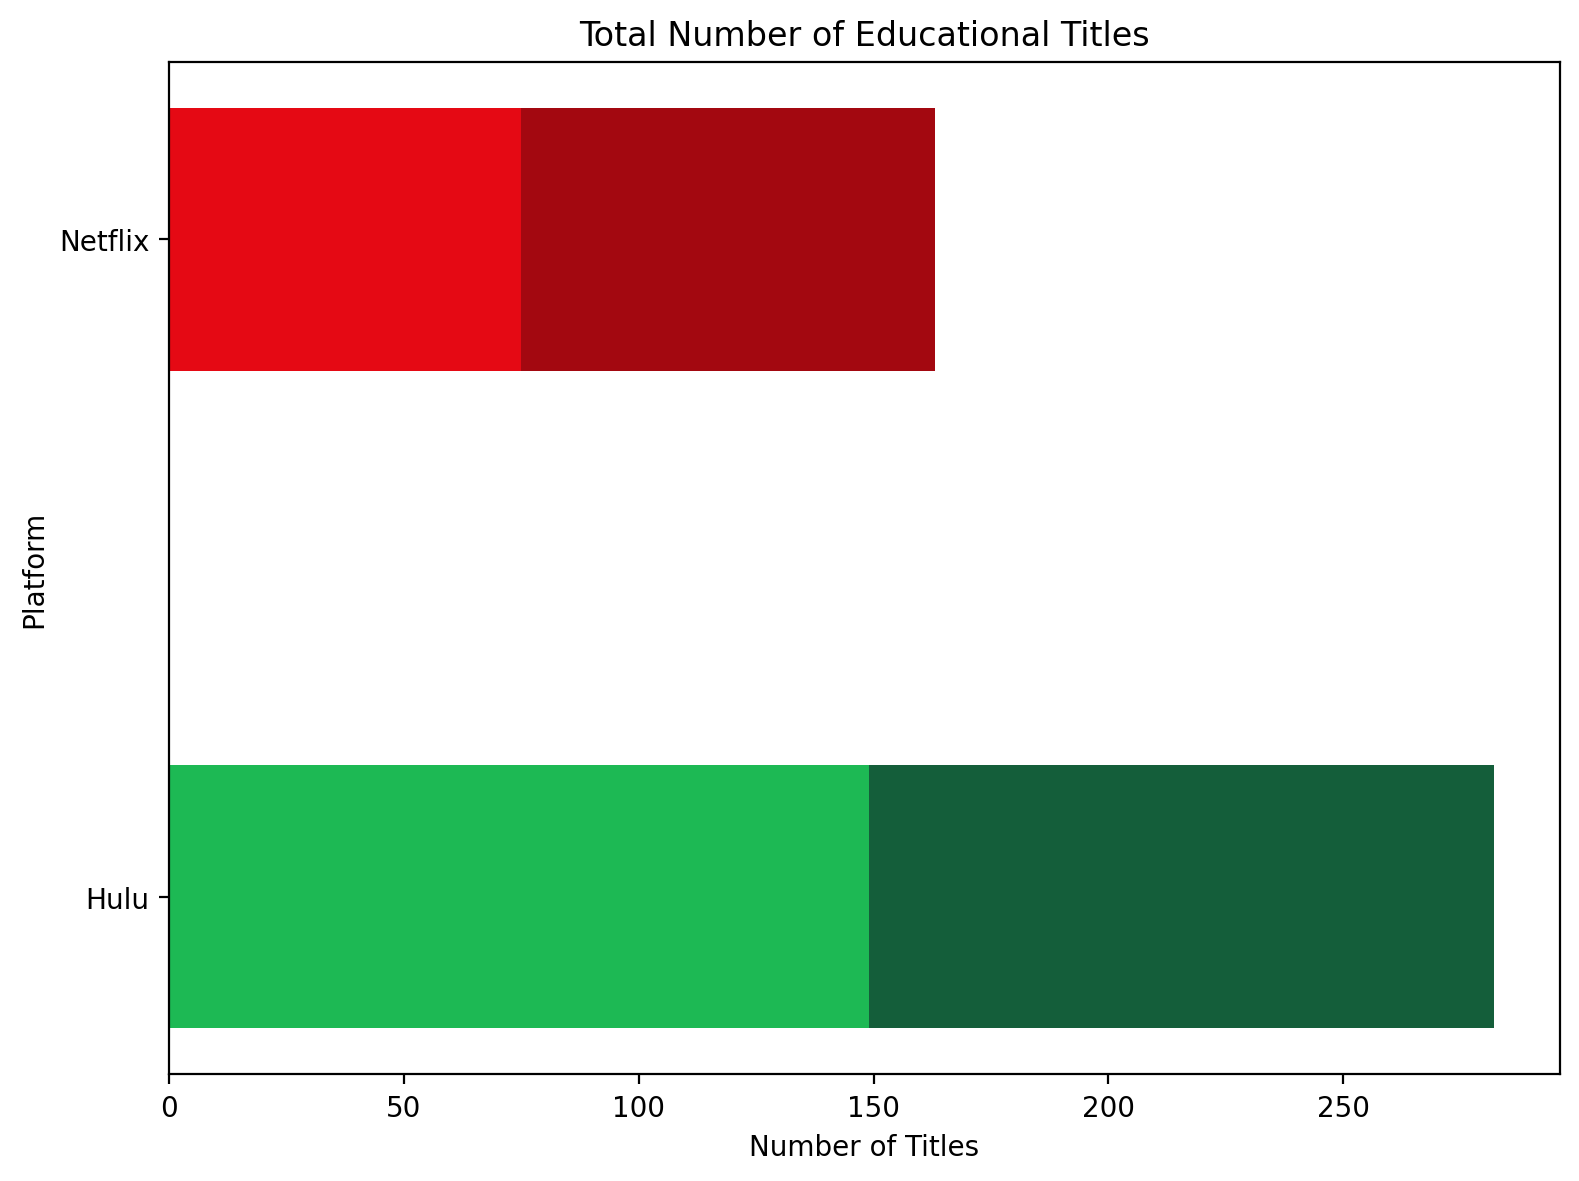

In [95]:
hulu_edu_count = len(dfHulu_edu)
netflix_edu_count = len(dfNetflix_edu)

edu_counts = pd.DataFrame({
    'Platform': ['Hulu', 'Netflix'],
    'Count': [hulu_edu_count, netflix_edu_count]
})

edu_counts = edu_counts.sort_values(by='Count', ascending=False)

hulu_edu_above_7 = len(dfHulu_edu[dfHulu_edu['IMDB_Rating'] > 7])
netflix_edu_above_7 = len(dfNetflix_edu[dfNetflix_edu['IMDB_Rating'] > 7])

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(edu_counts['Platform'], edu_counts['Count'], color=['#1DB954', '#E50914'], height=0.4)

colors = {
    'Hulu': '#145e3a',
    'Netflix': '#a30810'
}

for bar, platform in zip(bars, edu_counts['Platform']):
    count_above_7 = hulu_edu_above_7 if platform == 'Hulu' else netflix_edu_above_7
    count_below_7 = edu_counts[edu_counts['Platform'] == platform]['Count'].values[0] - count_above_7
    ax.barh(platform, count_below_7, color=colors[platform], height=0.4, left=count_above_7)

ax.set_title('Total Number of Educational Titles')
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Platform')

plt.tight_layout()
plt.show()


/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_18321/4026250160.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  txt.set_text(f"{hulu_age_group_counts[i]} ({txt.get_text()})")
/var/folders/86/c2gz31wn29b2r_53d_q3g3hc0000gn/T/ipykernel_18321/4026250160.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  txt.set_text(f"{netflix_age_group_counts[i]} ({txt.get_text()})")


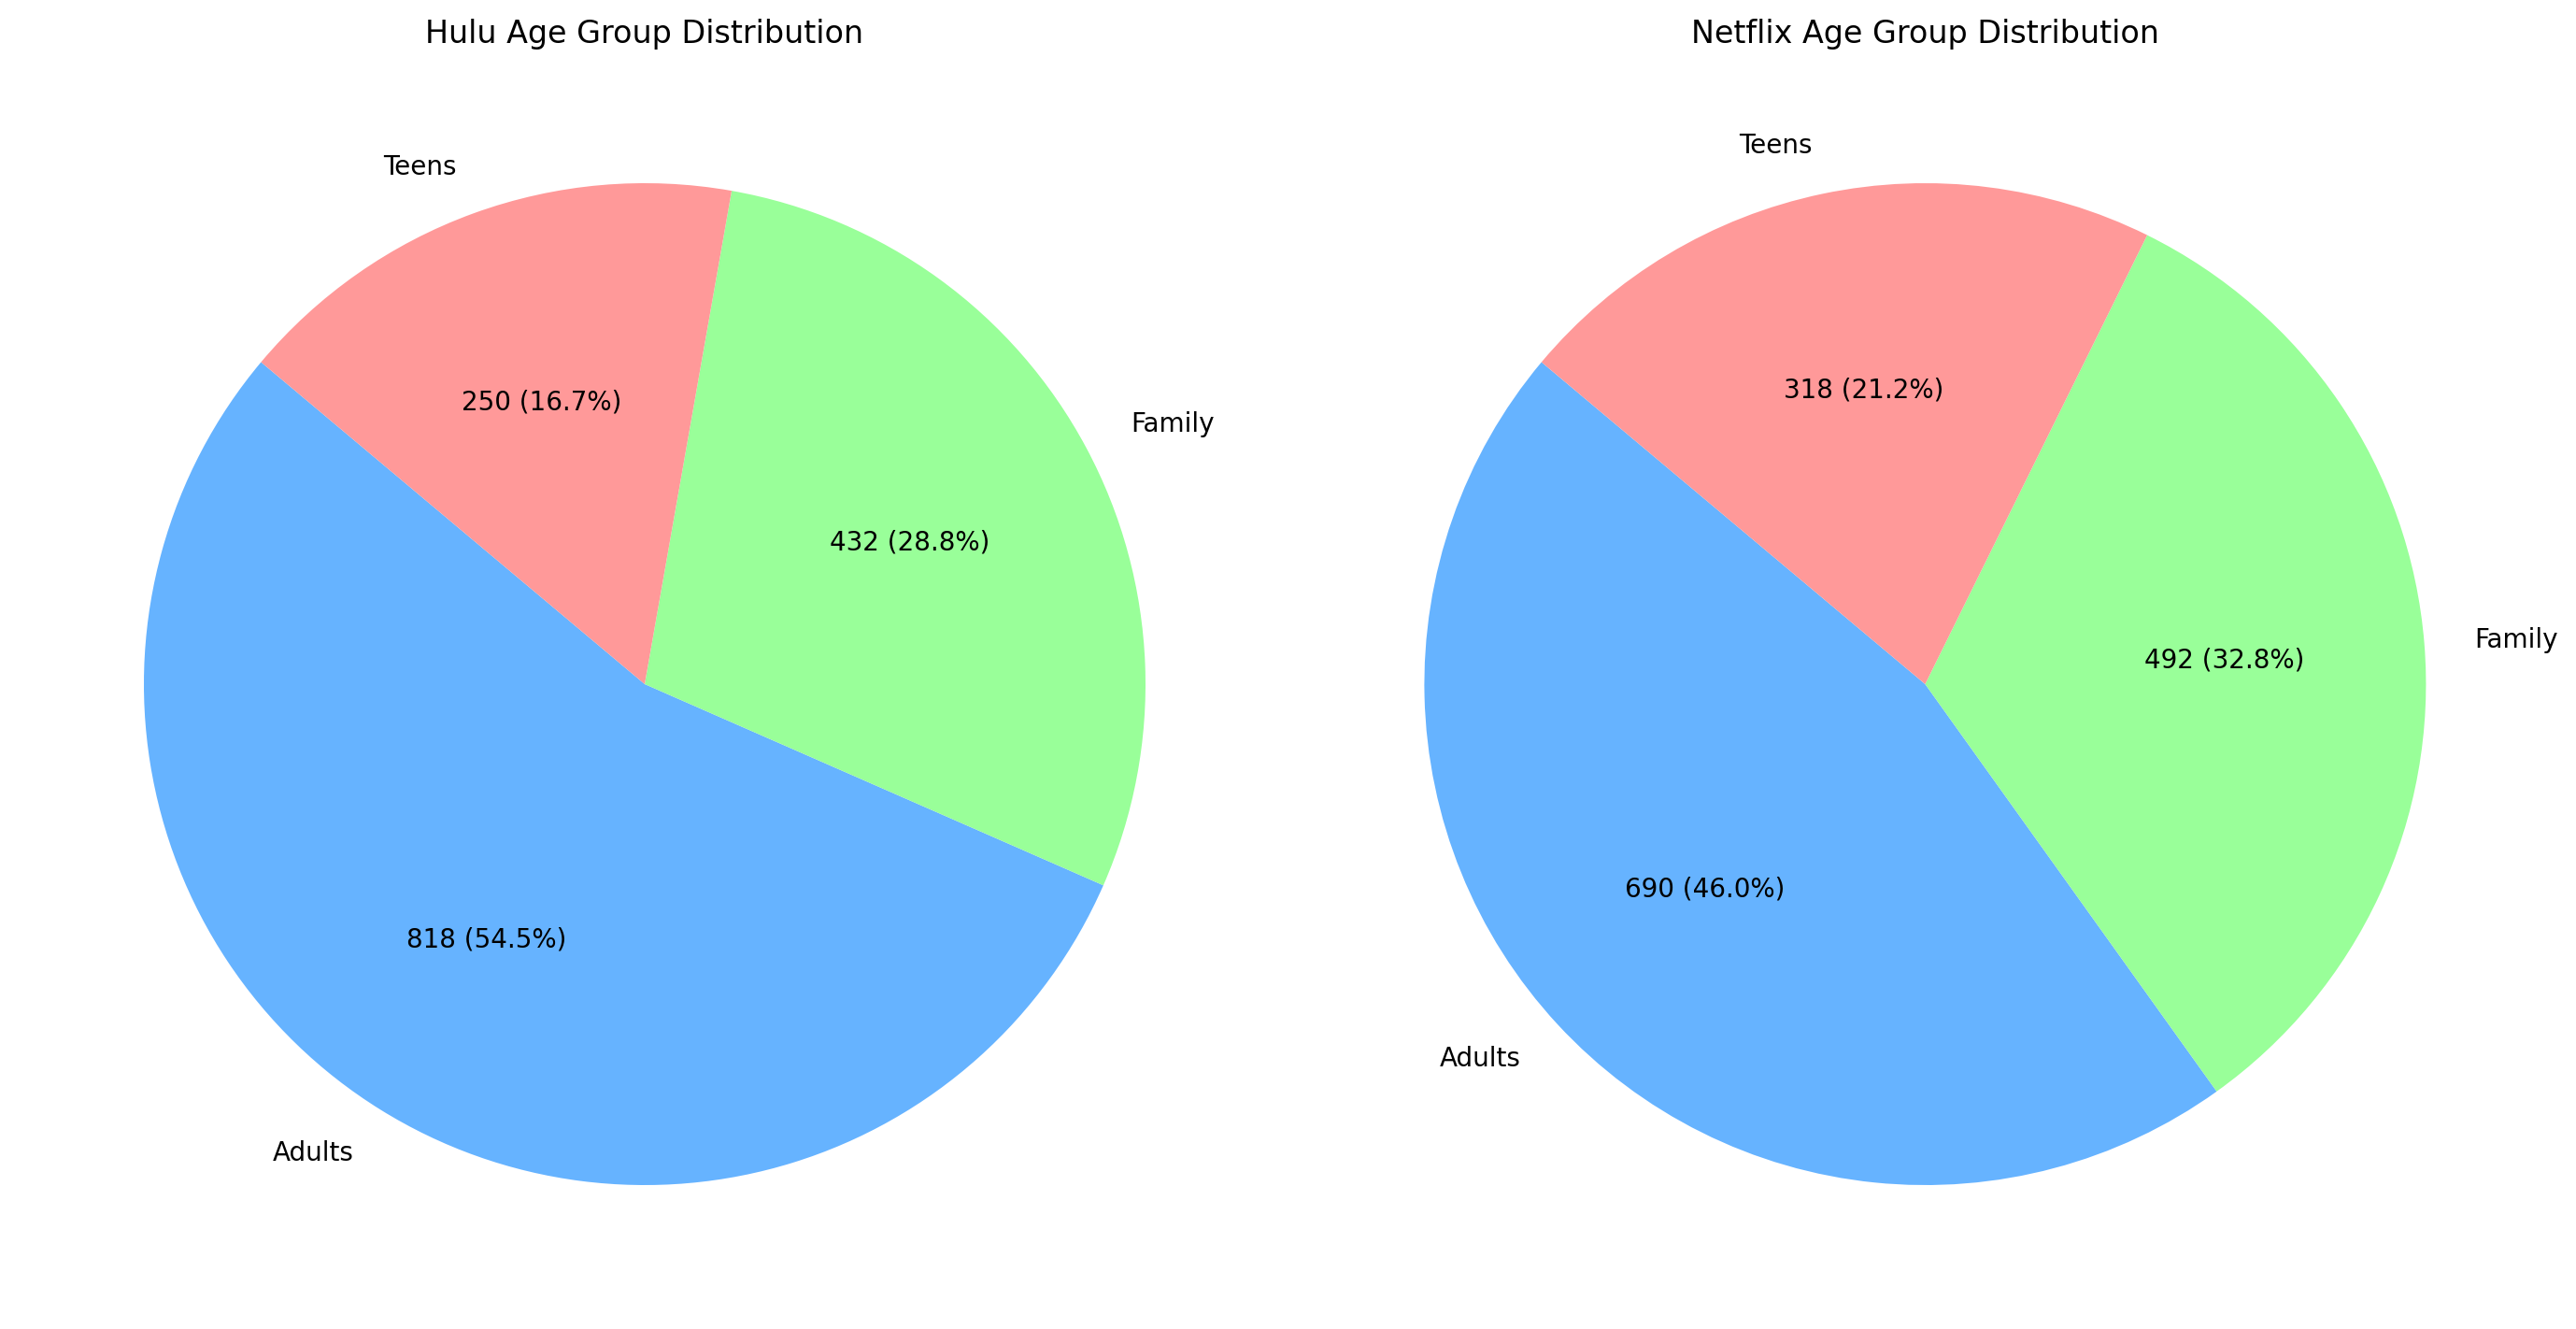

In [103]:
family_friendly = ['G', 'PG', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-PG']
teens = ['PG-13', 'TV-14']
adults = ['R', 'NC-17', 'TV-MA']

def classify_age_group(rating):
    if inCheck(family_friendly, rating):
        return 'Family'
    elif inCheck(teens, rating):
        return 'Teens'
    elif inCheck(adults, rating):
        return 'Adults'
    else:
        return 'Adults'
    
dfHulu1500['Age_group'] = dfHulu1500['rating'].apply(classify_age_group)
dfNetflix1500['Age_group'] = dfNetflix1500['rating'].apply(classify_age_group)

hulu_age_group_counts = dfHulu1500['Age_group'].value_counts()
netflix_age_group_counts = dfNetflix1500['Age_group'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

hulu_pie, hulu_texts, hulu_autotexts = axes[0].pie(
    hulu_age_group_counts, labels=hulu_age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999']
)
axes[0].set_title('Hulu Age Group Distribution')

for i, txt in enumerate(hulu_autotexts):
    txt.set_text(f"{hulu_age_group_counts[i]} ({txt.get_text()})")

netflix_pie, netflix_texts, netflix_autotexts = axes[1].pie(
    netflix_age_group_counts, labels=netflix_age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999']
)
axes[1].set_title('Netflix Age Group Distribution')

for i, txt in enumerate(netflix_autotexts):
    txt.set_text(f"{netflix_age_group_counts[i]} ({txt.get_text()})")

plt.tight_layout()
plt.show()



array(['TV-MA', 'PG-13', nan, 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED',
       'G', 'TV-G', '2 Seasons', '93 min', '4 Seasons', 'TV-Y7',
       '136 min', '85 min', '98 min', 'TV-Y', '89 min', '86 min',
       '3 Seasons', '121 min', '88 min', '101 min', '1 Season', '83 min',
       '100 min', '95 min', '92 min', '99 min', '96 min', '109 min',
       '75 min', '87 min', '67 min', '104 min', '94 min', '91 min',
       '107 min', '84 min', '119 min', '114 min', '105 min', '103 min',
       '82 min', '90 min', '110 min', '130 min', '80 min', '6 Seasons',
       '97 min', '81 min', '111 min', '49 min', '41 min', '45 min',
       '73 min', '34 min', '47 min', '39 min', '36 min', '40 min',
       '65 min', '37 min', '78 min', '102 min', '129 min'], dtype=object)